# Q4

a. Implementing SGD Manually

Final B0: -2.6446, B1: 0.6874
Final Error: 0.2892


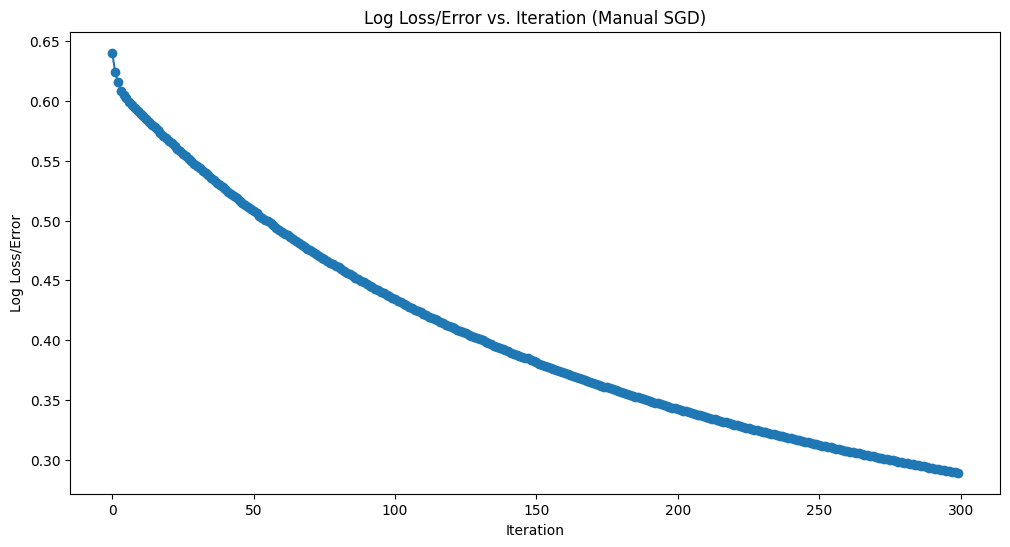

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Load dataset
data = pd.read_csv('pass-fail.csv')

# Extract features and labels
X = data[['Hours']].values
y = data['Pass'].values

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize parameters
B = np.zeros(X.shape[1])
learning_rate = 0.01
n_iterations = 60
n_epochs = 5
errors = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# SGD loop
for epoch in range(n_epochs):
    for _ in range(n_iterations):
        # Shuffle data
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(len(y)):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            prediction = sigmoid(np.dot(xi, B))
            error = yi - prediction
            gradient = xi * error
            B += learning_rate * gradient

        # Calculate log loss
        y_pred = sigmoid(np.dot(X, B))
        error = log_loss(y, y_pred)
        errors.append(error)

# Print final parameters and error
print(f"Final B0: {B[0]:.4f}, B1: {B[1]:.4f}")
print(f"Final Error: {errors[-1]:.4f}")

# Plot error vs. iteration
plt.figure(figsize=(12, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Iteration (Manual SGD)')
plt.show()


b. Logistic Regression Using scikit-learn

c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iter

Final B0 (scikit-learn): -2.6426
Final B1 (scikit-learn): 0.6864
Final Error (scikit-learn): 0.2893


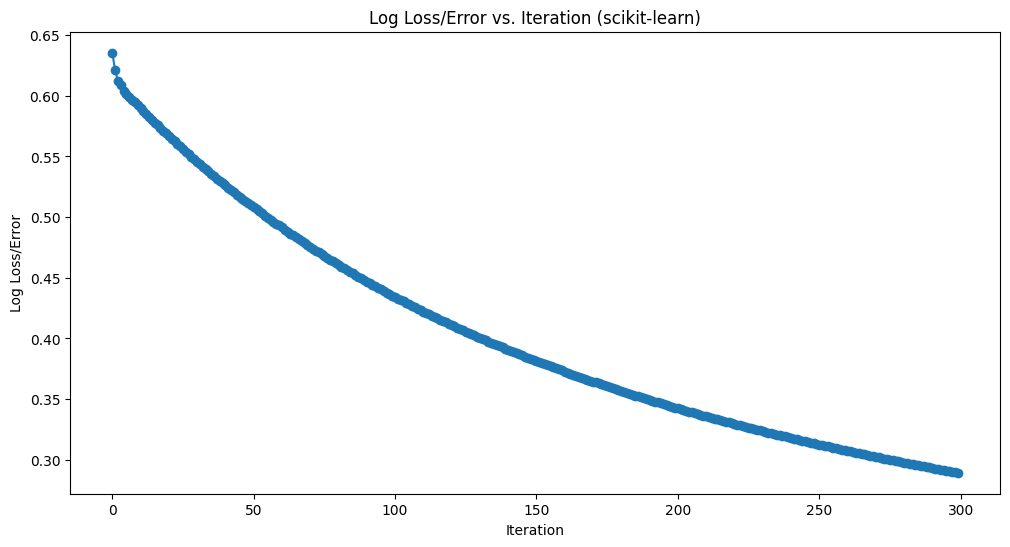

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Initialize SGDClassifier for logistic regression
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=learning_rate)

# Store results
b0_values = []
b1_values = []
errors = []

for epoch in range(n_epochs):
    for _ in range(n_iterations):
        sgd_clf.fit(X[:, 1:], y)  # Fit without intercept term
        y_pred = sgd_clf.predict_proba(X[:, 1:])[:, 1]  # Probability of class 1
        error = log_loss(y, y_pred)
        
        b0_values.append(sgd_clf.intercept_[0])
        b1_values.append(sgd_clf.coef_[0][0])
        errors.append(error)

# Print final parameters and error
print(f"Final B0 (scikit-learn): {b0_values[-1]:.4f}")
print(f"Final B1 (scikit-learn): {b1_values[-1]:.4f}")
print(f"Final Error (scikit-learn): {errors[-1]:.4f}")

# Plot error vs. iteration (scikit-learn)
plt.figure(figsize=(12, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Iteration (scikit-learn)')
plt.show()


c. Comparison of Errors

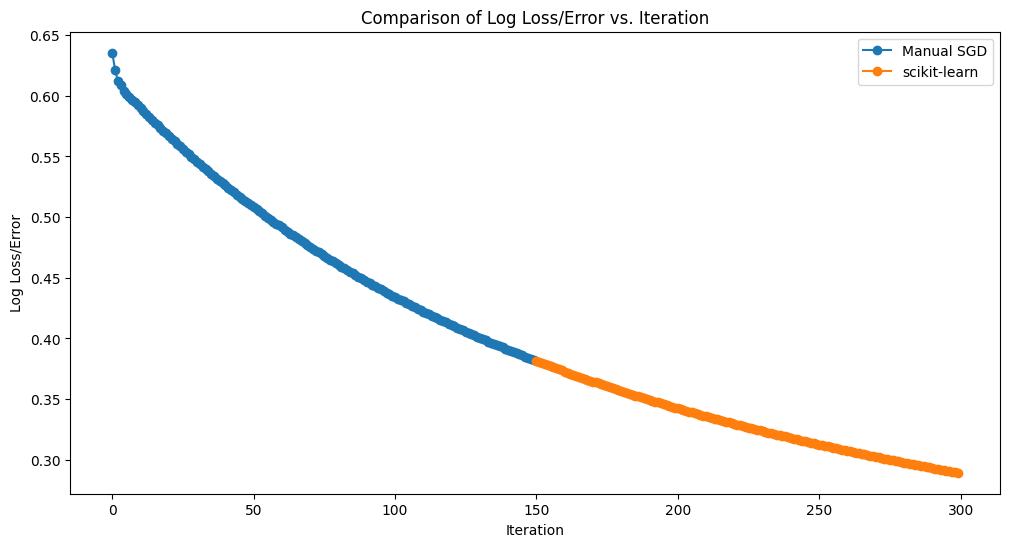

In [3]:
plt.figure(figsize=(12, 6))

# Assuming errors from manual SGD and scikit-learn have the same length
iterations = range(len(errors))

plt.plot(iterations[:len(errors)//2], errors[:len(errors)//2], label='Manual SGD', marker='o', linestyle='-')
plt.plot(iterations[len(errors)//2:], errors[len(errors)//2:], label='scikit-learn', marker='o', linestyle='-')

plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Comparison of Log Loss/Error vs. Iteration')
plt.legend()
plt.show()


d. Plotting -log(x) and -log(1-x)

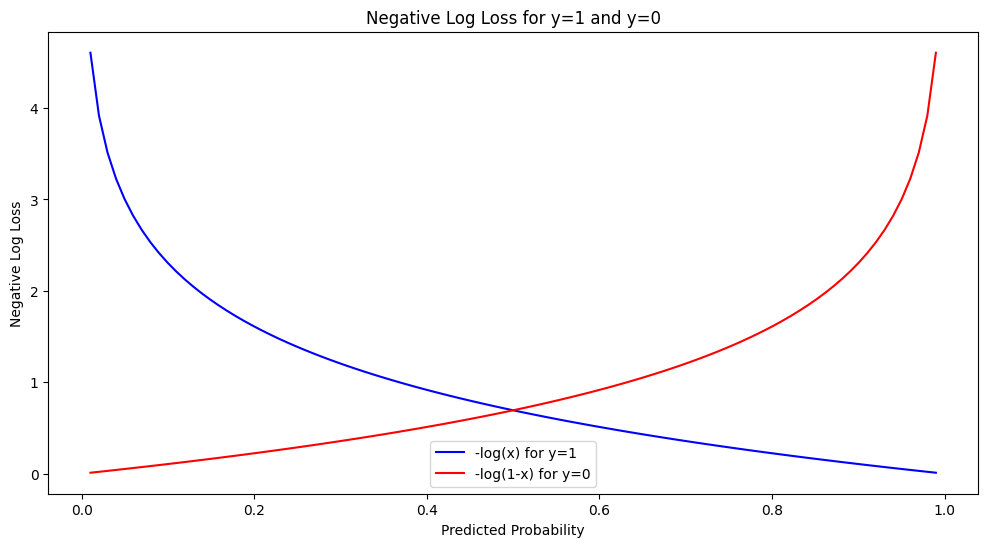

In [4]:
x_values = np.linspace(0.01, 0.99, 100)

# -log(x) for y=1
log_loss_y1 = -np.log(x_values)

# -log(1-x) for y=0
log_loss_y0 = -np.log(1 - x_values)

plt.figure(figsize=(12, 6))

# Plot -log(x) for y=1
plt.plot(x_values, log_loss_y1, label='-log(x) for y=1', color='blue')

# Plot -log(1-x) for y=0
plt.plot(x_values, log_loss_y0, label='-log(1-x) for y=0', color='red')

# Plot combined graph
plt.xlabel('Predicted Probability')
plt.ylabel('Negative Log Loss')
plt.title('Negative Log Loss for y=1 and y=0')
plt.legend()
plt.show()
